In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
import numpy as np
from numpy import savez_compressed
from numpy import asarray
import pickle
Facenet_model_path = "C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/recognition_model.pickle"
SVC_model_path = "C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/classifier_model.pickle"


data = np.load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-dataset_masked.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (15, 160, 160, 3) (15,) (4, 160, 160, 3) (4,)


In [14]:
# load the facenet model
model = load_model('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/facenet_keras.h5')

print('Loaded Model')

Loaded Model


In [15]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
# get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]
    
def save_embeddings():
  #load the face dataset
    data = np.load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-dataset_masked.npz')
    trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
    # load the facenet model
    model = load_model('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/facenet_keras.h5')
    print('Loaded Model')
    # convert each face in the train set to an embedding
    newTrainX = list()
    for face_pixels in trainX:
        embedding = get_embedding(model, face_pixels)
        newTrainX.append(embedding)
    newTrainX = asarray(newTrainX)
    print(newTrainX.shape)
    # convert each face in the test set to an embedding
    newTestX = list()
    for face_pixels in testX:
        embedding = get_embedding(model, face_pixels)
        newTestX.append(embedding)
    newTestX = asarray(newTestX)
    print(newTestX.shape)
    # save arrays to one file in compressed format
    savez_compressed('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-embeddings_masked.npz', newTrainX, trainy, newTestX, testy)

save_embeddings()

Loaded:  (15, 160, 160, 3) (15,) (4, 160, 160, 3) (4,)
Loaded Model
(15, 128)
(4, 128)


In [16]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

def model_creation():
    # load faces
    data = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-dataset_masked.npz')
    testX_faces = data['arr_2']
    # load face embeddings
    data = load('C:/Users/Tanya/Desktop/FYP/FYP - Full Stack/5-celebrity-faces-embeddings_masked.npz')
    trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    # normalize input vectors
    in_encoder = Normalizer(norm='l2')
    trainX = in_encoder.transform(trainX)
    testX = in_encoder.transform(testX)
    # label encode targets
    out_encoder = LabelEncoder()
    out_encoder.fit(trainy)
    trainy = out_encoder.transform(trainy)
    testy = out_encoder.transform(testy)
    # fit model
    model = SVC(kernel='linear', probability=True)
    model.fit(trainX, trainy)

    pickle.dump(model, open(SVC_model_path, 'wb'))
    print("All ok")
    return model
# prediction for the face
# samples = expand_dims(random_face_emb, axis=0)
# yhat_class = model.predict(samples)
# yhat_prob = model.predict_proba(samples)
# print(yhat_prob)
# # get name
# class_index = yhat_class[0]
# class_probability = yhat_prob[0,class_index] * 100
# predict_names = out_encoder.inverse_transform(yhat_class)
# print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
# print('Expected: %s' % random_face_name[0])
# # plot for fun
# pyplot.imshow(random_face_pixels)
# title = '%s (%.3f)' % (predict_names[0], class_probability)
# pyplot.title(title)
# pyplot.show()

[[0.07410492 0.06281515 0.7607895  0.10229043]]
Predicted: Pranjal_Mathur (76.079)
Expected: Pranjal_Mathur


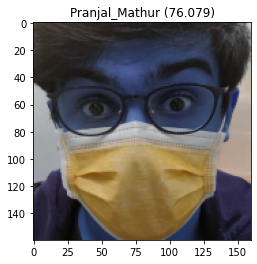

'Pranjal_Mathur'

In [22]:
def predict_name(face_emb,model):
    
    samples = expand_dims(face_emb, axis=0)
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    print(yhat_prob)
    #get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
    # plot for fun
    pyplot.imshow(random_face_pixels)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    pyplot.title(title)
    pyplot.show()
    return predict_names[0]


# # test model on a random example from the test dataset
# selection = choice([i for i in range(testX.shape[0])])
# #selection = 5
# random_face_pixels = testX_faces[selection]
# random_face_emb = testX[selection]
# random_face_class = testy[selection]
# random_face_name = out_encoder.inverse_transform([random_face_class])
# model = model_creation()
# predict_name(random_face_emb,model)